In [90]:
import datetime # Tipo de dato para fechas y horas
import pandas as pd # Manejo de datos tabulados
import numpy as np # Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt # Graficos de datos
import seaborn as sns # Graficos estadisticos
import pandas_profiling as ppr # ?????????
import geopandas as gpd # Pandas para datos geograficos (Mapas!!)
from fitter import Fitter # Ajuste de distribuciones de probs
from pandas_profiling import ProfileReport
import plotly as pl
import cufflinks as cf 

In [91]:
%matplotlib inline

## Cargando los Datos de los Niños del Centro de Salud
Estos datos no estan procesados aun.

In [92]:
dfn1 = pd.read_csv('../data/Niños LIMA DIRIS CENTRO.csv')
dfn2 = pd.read_csv('../data/Niños LIMA DIRIS ESTE.csv')
dfn3 = pd.read_csv('../data/Niños LIMA DIRIS NORTE.csv')
dfn4 = pd.read_csv('../data/Niños LIMA DIRIS SUR.csv')
dfn5 = pd.read_csv('../data/Niños LIMA.csv')

In [93]:
dfn_todos = pd.concat([dfn1, dfn2,dfn3,dfn4, dfn5])
dfn_todos.columns

Index(['Diresa', 'Red', 'Microred', 'EESS', 'Dpto_EESS', 'Prov_EESS',
       'Dist_EESS', 'Renipress', 'FechaAtencion', 'Sexo', 'FechaNacimiento',
       'EdadMeses', 'UbigeoPN', 'DepartamentoPN', 'ProvinciaPN', 'DistritoPN',
       'CentroPobladoPN', 'Juntos', 'SIS', 'Pin', 'Qaliwarma', 'Peso', 'Talla',
       'Hemoglobina', 'FechaHemoglobina', 'Cred', 'Suplementacion',
       'Consejeria', 'Sesion', 'UbigeoREN', 'DepartamentoREN', 'ProvinciaREN',
       'DistritoREN', 'AlturaREN', 'HBC', 'Dx_Anemia'],
      dtype='object')

In [207]:
dfnt= dfn_todos.assign(Cantidad_Niños=1)
dfnt= dfnt[['Diresa','UbigeoPN','Prov_EESS','Dist_EESS', 'EdadMeses','Sexo','Peso', 'Talla','Hemoglobina','Dx_Anemia','Cantidad_Niños']]


In [208]:
dfnt= dfnt.dropna()
dfnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138369 entries, 0 to 21169
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Diresa          138369 non-null  object 
 1   UbigeoPN        138369 non-null  object 
 2   Prov_EESS       138369 non-null  object 
 3   Dist_EESS       138369 non-null  object 
 4   EdadMeses       138369 non-null  int64  
 5   Sexo            138369 non-null  object 
 6   Peso            138369 non-null  object 
 7   Talla           138369 non-null  object 
 8   Hemoglobina     138369 non-null  float64
 9   Dx_Anemia       138369 non-null  object 
 10  Cantidad_Niños  138369 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


## DATAFRAME DE NIÑOS CON/SIN ANEMIA

In [170]:
dfntn = dfnt[dfnt['Dx_Anemia']== 'Normal']               # El dataframe de ninos sanos
dfntn1 = dfnt[dfnt['Dx_Anemia']== 'Anemia Leve']         # El Dataframe con anemia leve
dfntn2 = dfnt[dfnt['Dx_Anemia']== 'Anemia Moderada']     # El Dataframe con anemia Moderada
dfntn3 = dfnt[dfnt['Dx_Anemia']== 'Anemia Severa']       # El Dataframe con anemia severa

ninos_con_Anemia = pd.concat([dfntn1,dfntn2,dfntn3])
ninos_sin_Anemia = dfntn.copy()


In [181]:
ddf4= ninos_con_Anemia.groupby('Sexo')['Cantidad_Niños'].count()
ddf4

Sexo
F    15935
M    18649
Name: Cantidad_Niños, dtype: int64

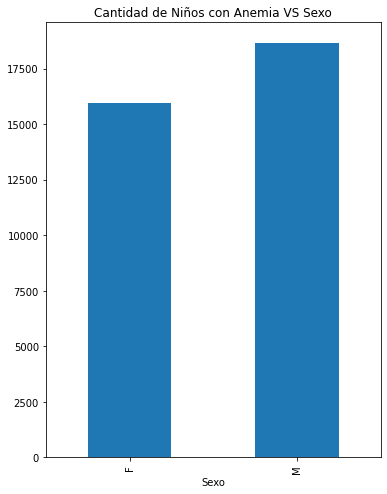

In [201]:
ddf4.plot(kind = "bar",figsize=(6,8), title="Cantidad de Niños con Anemia VS Sexo")
plt.show()

In [212]:
ddf1= dfnt.groupby('Dx_Anemia')['Cantidad_Niños'].count()
fd= pd.DataFrame(ddf1)
fd= fd.reset_index()
fd

,Dx_Anemia,Cantidad_Niños
0,Anemia Leve,25143
1,Anemia Moderada,9351
2,Anemia Severa,90
3,Normal,103785


In [211]:
# plotting
fd.iplot(kind='pie', labels='Dx_Anemia',
                         values='Cantidad_Niños',
                         title='NIÑOS CON/SIN ANEMIA (%)')

 ## Convertiendo la Edad en Rango de Edad

In [110]:
dfnt['EdadMeses'].describe()

count    138369.000000
mean         22.629693
std          14.078767
min           6.000000
25%          12.000000
50%          19.000000
75%          30.000000
max          60.000000
Name: EdadMeses, dtype: float64

In [112]:
counts, bins = np.histogram(dfnt['EdadMeses'].dropna().values, bins=7)
bins

array([ 6.        , 13.71428571, 21.42857143, 29.14285714, 36.85714286,
       44.57142857, 52.28571429, 60.        ])

In [113]:
rangos_edad = [6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61]
edad_bins = pd.cut(dfnt['EdadMeses'], bins=rangos_edad)

edad_bins_count = edad_bins.value_counts()

In [218]:
RangoEdad= pd.DataFrame(edad_bins_count)
RangoEdad

,EdadMeses
"(6, 11]",24974
"(11, 16]",24531
"(16, 21]",20208
"(21, 26]",16273
"(26, 31]",10860
"(31, 36]",8263
"(46, 51]",6453
"(36, 41]",5940
"(41, 46]",4744
"(51, 56]",4709


<AxesSubplot:title={'center':'Cantidad de Niños por Rango de Edad'}>

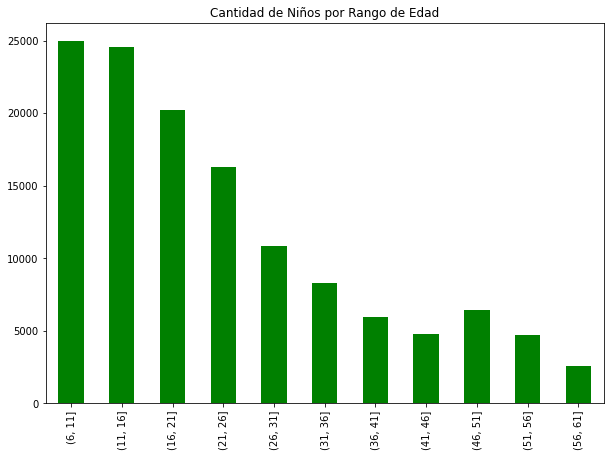

In [131]:
edad_bins_count.sort_index().plot(kind='bar', figsize=(10,7),title="Cantidad de Niños por Rango de Edad", color='green')

## Cargando los Datos de las Madres Gestantes del Centro de Salud
Estos datos no estan procesados aun.

In [ ]:
dfg1 = pd.read_csv('../data/Gestantes Lima Centro.csv')
dfg2 = pd.read_csv('../data/Gestantes Lima Sur.csv')
dfg3 = pd.read_csv('../data/Gestantes Lima Este.csv')
dfg4 = pd.read_csv('../data/Gestantes Lima.csv')

In [ ]:
dfg_todos = pd.concat([dfg1, dfg2,dfg3,dfg4])
dfg_todos.head(3)

,DIRESA,RED,MICRORED,EESS,RENIPRESS,Fecha,Edad,Edad_Gestacional,Peso,Talla,...,Provincia,Distrito,Altitud_Dist,Localidad,Altitud_Loc,Hematocrito,Hemoglobina,FechaHemoglobina,Hbc,Dx_Anemia
0,DIRIS LIMA CENTRO,DIRIS LIMA CENTRO,RIS 07 SJL,C.S. 10 DE OCTUBRE,5616,01-Feb-21,32,12,68.0,149.0,...,LIMA,SAN JUAN DE LURIGANCHO,220,10 DE OCTUBRE,220,0.0,12.0,23-ene-21,12.0,Normal
1,DIRIS LIMA CENTRO,DIRIS LIMA CENTRO,RIS 07 SJL,C.S. 10 DE OCTUBRE,5616,10-Feb-21,28,34,80.0,153.0,...,LIMA,SAN JUAN DE LURIGANCHO,220,10 DE OCTUBRE,220,0.0,12.3,10-Feb-21,12.3,Normal
2,DIRIS LIMA CENTRO,DIRIS LIMA CENTRO,RIS 07 SJL,C.S. 10 DE OCTUBRE,5616,22-Feb-21,25,15,77.4,158.0,...,LIMA,SAN JUAN DE LURIGANCHO,220,A.A.H.H SOMOS LIBRES,220,0.0,12.0,17-Feb-21,12.0,Normal


In [ ]:
#dfg_todos.info()

In [ ]:
dfg_todos.columns

Index(['RED', 'MICRORED', 'EESS', 'RENIPRESS', 'Fecha', 'Edad',
       'Edad_Gestacional', 'Peso', 'Talla', 'PPG', 'Tipo_Embarazo', 'UBIGEO',
       'Provincia', 'Distrito', 'Altitud_Dist', 'Localidad', 'Altitud_Loc',
       'Hematocrito', 'Hemoglobina', 'FechaHemoglobina', 'Hbc', 'Dx_Anemia'],
      dtype='object')

In [ ]:
dfg_todos.shape

(17179, 22)

In [ ]:
##CLASIFICACION DE LAS MADRES GESTANTES CON / SIN ANEMIA


In [ ]:
dfgtg = dfg_todos[dfg_todos['Dx_Anemia']== 'Normal']
dfgtg1 = dfg_todos[dfg_todos['Dx_Anemia']== 'Anemia Leve']
dfgtg2 = dfg_todos[dfg_todos['Dx_Anemia']== 'Anemia Moderada']
dfgtg3 = dfg_todos[dfg_todos['Dx_Anemia']== 'Anemia Severa']

In [ ]:
gestantes_con_Anemia = pd.concat([dfgtg1,dfgtg2,dfgtg3])
gestantes_sin_Anemia = dfgtg.copy()

In [ ]:
gestantes_sin_Anemia.head(1)

,RED,MICRORED,EESS,RENIPRESS,Fecha,Edad,Edad_Gestacional,Peso,Talla,PPG,...,Provincia,Distrito,Altitud_Dist,Localidad,Altitud_Loc,Hematocrito,Hemoglobina,FechaHemoglobina,Hbc,Dx_Anemia
DIRESA,,,,,,,,,,,,,,,,,,,,,
DIRIS LIMA CENTRO,DIRIS LIMA CENTRO,RIS 07 SJL,C.S. 10 DE OCTUBRE,5616,01-feb-21,32.0,12.0,68.0,149.0,68.0,...,LIMA,SAN JUAN DE LURIGANCHO,220.000,10 DE OCTUBRE,220.0,0.0,12.0,23-ene-21,12.0,Normal


In [ ]:
tdinamica = dfg_todos.groupby('Distrito')


In [ ]:
tdinamica.head()

,RED,MICRORED,EESS,RENIPRESS,Fecha,Edad,Edad_Gestacional,Peso,Talla,PPG,...,Provincia,Distrito,Altitud_Dist,Localidad,Altitud_Loc,Hematocrito,Hemoglobina,FechaHemoglobina,Hbc,Dx_Anemia
DIRESA,,,,,,,,,,,,,,,,,,,,,
DIRIS LIMA CENTRO,DIRIS LIMA CENTRO,RIS 07 SJL,C.S. 10 DE OCTUBRE,5616,01-feb-21,32.0,12.0,68.0,149.0,68.0,...,LIMA,SAN JUAN DE LURIGANCHO,220.000,10 DE OCTUBRE,220.0,0.0,12.0,23-ene-21,12.0,Normal
DIRIS LIMA CENTRO,DIRIS LIMA CENTRO,RIS 07 SJL,C.S. 10 DE OCTUBRE,5616,10-feb-21,28.0,34.0,80.0,153.0,74.0,...,LIMA,SAN JUAN DE LURIGANCHO,220.000,10 DE OCTUBRE,220.0,0.0,12.3,10-feb-21,12.3,Normal
DIRIS LIMA CENTRO,DIRIS LIMA CENTRO,RIS 07 SJL,C.S. 10 DE OCTUBRE,5616,22-feb-21,25.0,15.0,77.4,158.0,80.0,...,LIMA,SAN JUAN DE LURIGANCHO,220.000,A.A.H.H SOMOS LIBRES,220.0,0.0,12.0,17-feb-21,12.0,Normal
DIRIS LIMA CENTRO,DIRIS LIMA CENTRO,RIS 07 SJL,C.S. 10 DE OCTUBRE,5616,22-feb-21,19.0,37.0,82.0,160.0,62.0,...,LIMA,SAN JUAN DE LURIGANCHO,220.000,NaN,220.0,0.0,13.3,18-feb-21,13.3,Normal
DIRIS LIMA CENTRO,DIRIS LIMA CENTRO,RIS 07 SJL,C.S. 10 DE OCTUBRE,5616,24-feb-21,39.0,35.0,87.0,151.0,86.0,...,LIMA,SAN JUAN DE LURIGANCHO,220.000,10 DE OCTUBRE,220.0,0.0,12.7,03-feb-21,12.7,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LIMA,HUAROCHIRI,LANGA,P.S. LAHUAYTAMBO,5910,06-jun-21,28.0,35.0,71.5,154.0,62.0,...,HUAROCHIRI,LAHUAYTAMBO,3338.0,LAHUAYTAMBO,3300.0,0.0,10.9,02-jun-21,8.6,Anemia Moderada
LIMA,HUAROCHIRI,LANGA,P.S. MATARA,5917,23-may-21,19.0,30.0,55.0,150.0,50.0,...,HUAROCHIRI,SANTO DOMINGO DE LOS OLLEROS,2830.0,MATARA,2800.0,0.0,13.2,23-may-21,11.6,Normal
LIMA,HUAROCHIRI,LANGA,P.S. VILLA JARDIN CUCUYA,23602,17-feb-21,31.0,26.0,58.2,148.0,54.0,...,HUAROCHIRI,SANTO DOMINGO DE LOS OLLEROS,2830.0,VILLA JARDIN DE CUCUYA,500.0,0.0,11.4,13-ene-21,11.4,Normal


In [ ]:
tdinamica.columns

Index(['RED', 'MICRORED', 'EESS', 'RENIPRESS', 'Fecha', 'Edad',
       'Edad_Gestacional', 'Peso', 'Talla', 'PPG', 'Tipo_Embarazo', 'UBIGEO',
       'Provincia', 'Altitud_Dist', 'Localidad', 'Altitud_Loc', 'Hematocrito',
       'Hemoglobina', 'FechaHemoglobina', 'Hbc', 'Dx_Anemia'],
      dtype='object')

In [ ]:
tdinamica.head()

,RED,MICRORED,EESS,RENIPRESS,Fecha,Edad,Edad_Gestacional,Peso,Talla,PPG,...,UBIGEO,Provincia,Altitud_Dist,Localidad,Altitud_Loc,Hematocrito,Hemoglobina,FechaHemoglobina,Hbc,Dx_Anemia
Distrito,,,,,,,,,,,,,,,,,,,,,
AMBAR,28,28,28,28,28,28,28,28,28,28,...,28,28,28,23,28,28,28,28,28,28
ANDAJES,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
ANTIOQUIA,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
ATAVILLOS ALTO,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ATAVILLOS BAJO,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [ ]:
dfn1 = pd.read_csv('../data/Niños LIMA DIRIS CENTRO.csv', index_col=0, encoding ='latin-1')
dfn2 = pd.read_csv('../data/Niños LIMA DIRIS ESTE.csv', index_col=0, encoding ='latin-1')
dfn3 = pd.read_csv('../data/Niños LIMA DIRIS NORTE.csv', index_col=0, encoding ='latin-1')
dfn4 = pd.read_csv('../data/Niños LIMA DIRIS SUR.csv', index_col=0, encoding ='latin-1')
dfn5 = pd.read_csv('../data/Niños LIMA.csv', index_col=0, encoding ='latin-1')

In [ ]:
dfn_todos = pd.concat([dfn1, dfn2,dfn3,dfn4, dfn5])
dfn_todos.columns

Index(['Diresa', 'Red', 'Microred', 'EESS', 'Dpto_EESS', 'Prov_EESS',
       'Dist_EESS', 'Renipress', 'FechaAtencion', 'Sexo', 'FechaNacimiento',
       'EdadMeses', 'UbigeoPN', 'DepartamentoPN', 'ProvinciaPN', 'DistritoPN',
       'CentroPobladoPN', 'Juntos', 'SIS', 'Pin', 'Qaliwarma', 'Peso', 'Talla',
       'Hemoglobina', 'FechaHemoglobina', 'Cred', 'Suplementacion',
       'Consejeria', 'Sesion', 'UbigeoREN', 'DepartamentoREN', 'ProvinciaREN',
       'DistritoREN', 'AlturaREN', 'HBC', 'Dx_Anemia'],
      dtype='object')

In [ ]:
dfnt = dfn_todos[['Red', 'Microred', 'EESS','FechaAtencion', 'Sexo', 'FechaNacimiento', 'EdadMeses',
       'UbigeoPN', 'DepartamentoPN', 'ProvinciaPN', 'DistritoPN',
       'CentroPobladoPN', 'SIS', 'Suplementacion', 'HBC', 'Dx_Anemia']]

In [ ]:
dfnt.head()

,Red,Microred,EESS,FechaAtencion,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,DepartamentoPN,ProvinciaPN,DistritoPN,CentroPobladoPN,SIS,Suplementacion,HBC,Dx_Anemia
ï»¿Diresa,,,,,,,,,,,,,,,,
LIMA DIRIS CENTRO,NO PERTENECE A NINGUNA RED,NO PERTENECE A NINGUNA MICRORED,I-3 - 00005624 - JAIME ZUBIETA,11/28/2020,M,3/29/2020,8,,,,,,,0,11.411636,Normal
LIMA DIRIS CENTRO,NO PERTENECE A NINGUNA RED,NO PERTENECE A NINGUNA MICRORED,I-2 - 00006189 - PUESTO DE SALUD PALERMO,10/15/2020,F,1/17/2018,33,,,,,,,0,12.810581,Normal
LIMA DIRIS CENTRO,NO PERTENECE A NINGUNA RED,NO PERTENECE A NINGUNA MICRORED,III-1 - 00006206 - NACIONAL DOS DE MAYO,1/6/2020,F,1/12/2015,60,150101.0,LIMA,LIMA,LIMA,LIMA - CIUDAD,1,0,12.210581,Normal
LIMA DIRIS CENTRO,SAN JUAN DE LURIGANCHO,NO PERTENECE A NINGUNA MICRORED,I-3 - 00005835 - LA HUAYRONA,1/3/2020,M,1/24/2015,60,150132.0,LIMA,LIMA,SAN JUAN DE LURIGANCHO,"SAN JUAN DE LURIGANCHO, CIUDAD",1,0,12.211636,Normal
LIMA DIRIS CENTRO,NO PERTENECE A NINGUNA RED,NO PERTENECE A NINGUNA MICRORED,I-3 - 00006183 - CENTRO DE SALUD TODOS LOS S...,1/25/2020,M,1/30/2015,60,150130.0,LIMA,LIMA,SAN BORJA,SAN FRANCISCO DE BORJA - CIUDAD,1,0,12.011028,Normal


In [ ]:
dfnt.head(3)

,Red,Microred,EESS,FechaAtencion,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,DepartamentoPN,ProvinciaPN,DistritoPN,CentroPobladoPN,SIS,Suplementacion,HBC,Dx_Anemia
ï»¿Diresa,,,,,,,,,,,,,,,,
LIMA DIRIS CENTRO,NO PERTENECE A NINGUNA RED,NO PERTENECE A NINGUNA MICRORED,I-3 - 00005624 - JAIME ZUBIETA,11/28/2020,M,3/29/2020,8,,,,,,,0,11.411636,Normal
LIMA DIRIS CENTRO,NO PERTENECE A NINGUNA RED,NO PERTENECE A NINGUNA MICRORED,I-2 - 00006189 - PUESTO DE SALUD PALERMO,10/15/2020,F,1/17/2018,33,,,,,,,0,12.810581,Normal
LIMA DIRIS CENTRO,NO PERTENECE A NINGUNA RED,NO PERTENECE A NINGUNA MICRORED,III-1 - 00006206 - NACIONAL DOS DE MAYO,1/6/2020,F,1/12/2015,60,150101.0,LIMA,LIMA,LIMA,LIMA - CIUDAD,1,0,12.210581,Normal


In [ ]:
dfnt.Dx_Anemia.unique()

array(['Normal', 'Anemia Leve', 'Anemia Moderada', 'Anemia Severa'],
      dtype=object)

In [ ]:
dfntn = dfnt[dfnt['Dx_Anemia']== 'Normal']

In [ ]:
dfntn = dfnt[dfnt['Dx_Anemia']== 'Normal']
dfntn1 = dfnt[dfnt['Dx_Anemia']== 'Anemia Leve']
dfntn2 = dfnt[dfnt['Dx_Anemia']== 'Anemia Moderada']
dfntn3 = dfnt[dfnt['Dx_Anemia']== 'Anemia Severa']
ninos_con_Anemia = pd.concat([dfntn1,dfntn2,dfntn3])
ninos_con_Anemia.sample(frac=0.01).shape

(346, 37)

In [ ]:
dfntn1 = dfnt[dfnt['Dx_Anemia']== 'Anemia Leve']
dfntn2 = dfnt[dfnt['Dx_Anemia']== 'Anemia Moderada']
dfntn3 = dfnt[dfnt['Dx_Anemia']== 'Anemia Severa']

In [ ]:
ninos_con_Anemia = pd.concat([dfntn1,dfntn2,dfntn3])

In [ ]:
ninos_con_Anemia.sample(frac=0.01).shape

(346, 16)

In [ ]:
dfn_todos.shape
%matplotlib inline

In [ ]:
dddf= ninos_con_Anemia[['HBC', 'EdadMeses']]

## Analisis Exploratorio de Datos

EDA: es el proceso de limpieza y descubrimiento de *insights* a través de la revisión detallada de un conjunto de datos.

### Pasos de preparación

1. Seleccionar las variables a analizar (que sean relevantes para el estudio)
1. Verificar la integridad de las variables (si están limpias o qué debemos hacer para limpiarlas o si no se pueden usar)
1. Plantearse preguntas de exploración
1. Plantear hipotesis a partir de nuestras variables*

### Pasos de EDA 

1. Limpiar los datos (80% del tiempo)
1. Responder las preguntas de exploración a partir de los datos (indicadores y gráficas)
1. Responder las hipótesis (Tests estadísticos | estadística descriptiva)*
1. Generar un reporte de resultados para el público en general 

> *Pasos opcionales dependiendo de la experiencia en el area de analisis

### Preguntas de exploración

1. ¿Cuál es la probabilidad de que una nina tenga anemia?
1. ¿Cuál es el distrito en donde los ninos padecen mas de anemia?
1. ¿Cuál es el rango de edad en que los ninos(a) padecen de anemia?
1. ¿Cuál fue el tiempo promedio de recuperación de las personas que lograron salir de UCI?